<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4.5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
			</font>
			<br />
			<br />
			<font color=#FF7983>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
			<font color=midblue>
هوش مصنوعی
            </font>
			<br />
           <font color=#738a9b> 
زمستان ۱۴۰۱
               </div>
		<hr/>
		<font color='red' size=6>
			<div align=center>
پروژه چهار
            </div>
		</font>
        <br />
		<div align=center>
بهیاد زرنقی 
            <br />
            شماره دانشجویی: ۸۱۰۶۹۸۲۴۹
        </div>
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            
		
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("G:\\E Learn\\Artificial Intelligence\\data\\diabetes.csv")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,NaN,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,NaN,0
765,5.0,NaN,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,NaN,1


# Section1: EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


## Missing Values

In [17]:
df.isna().sum()

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

In [18]:
df.isna().sum()/len(df)*100

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64

## Correlation

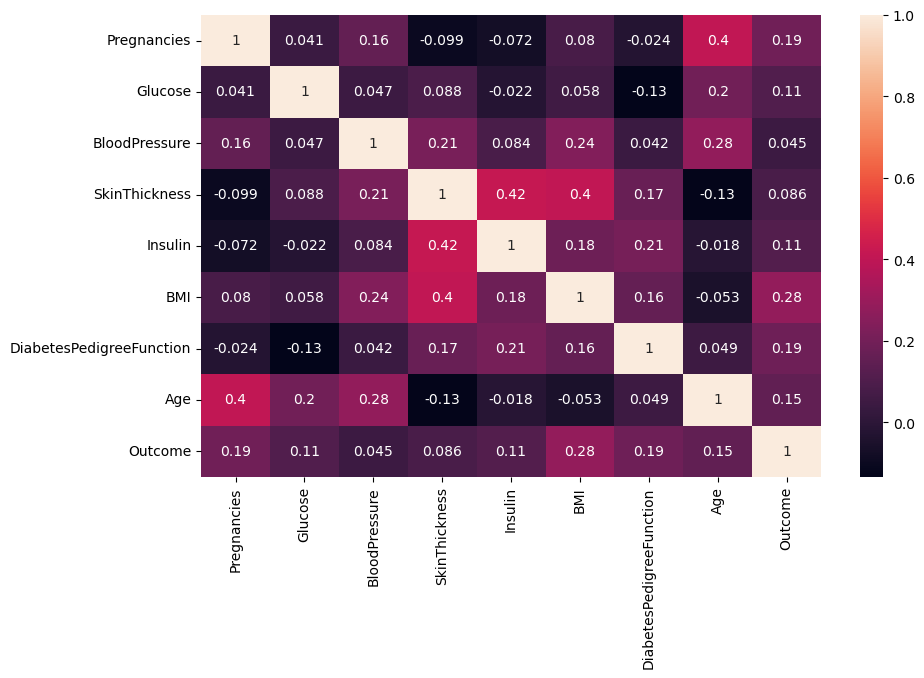

In [19]:
cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)
plt.show()

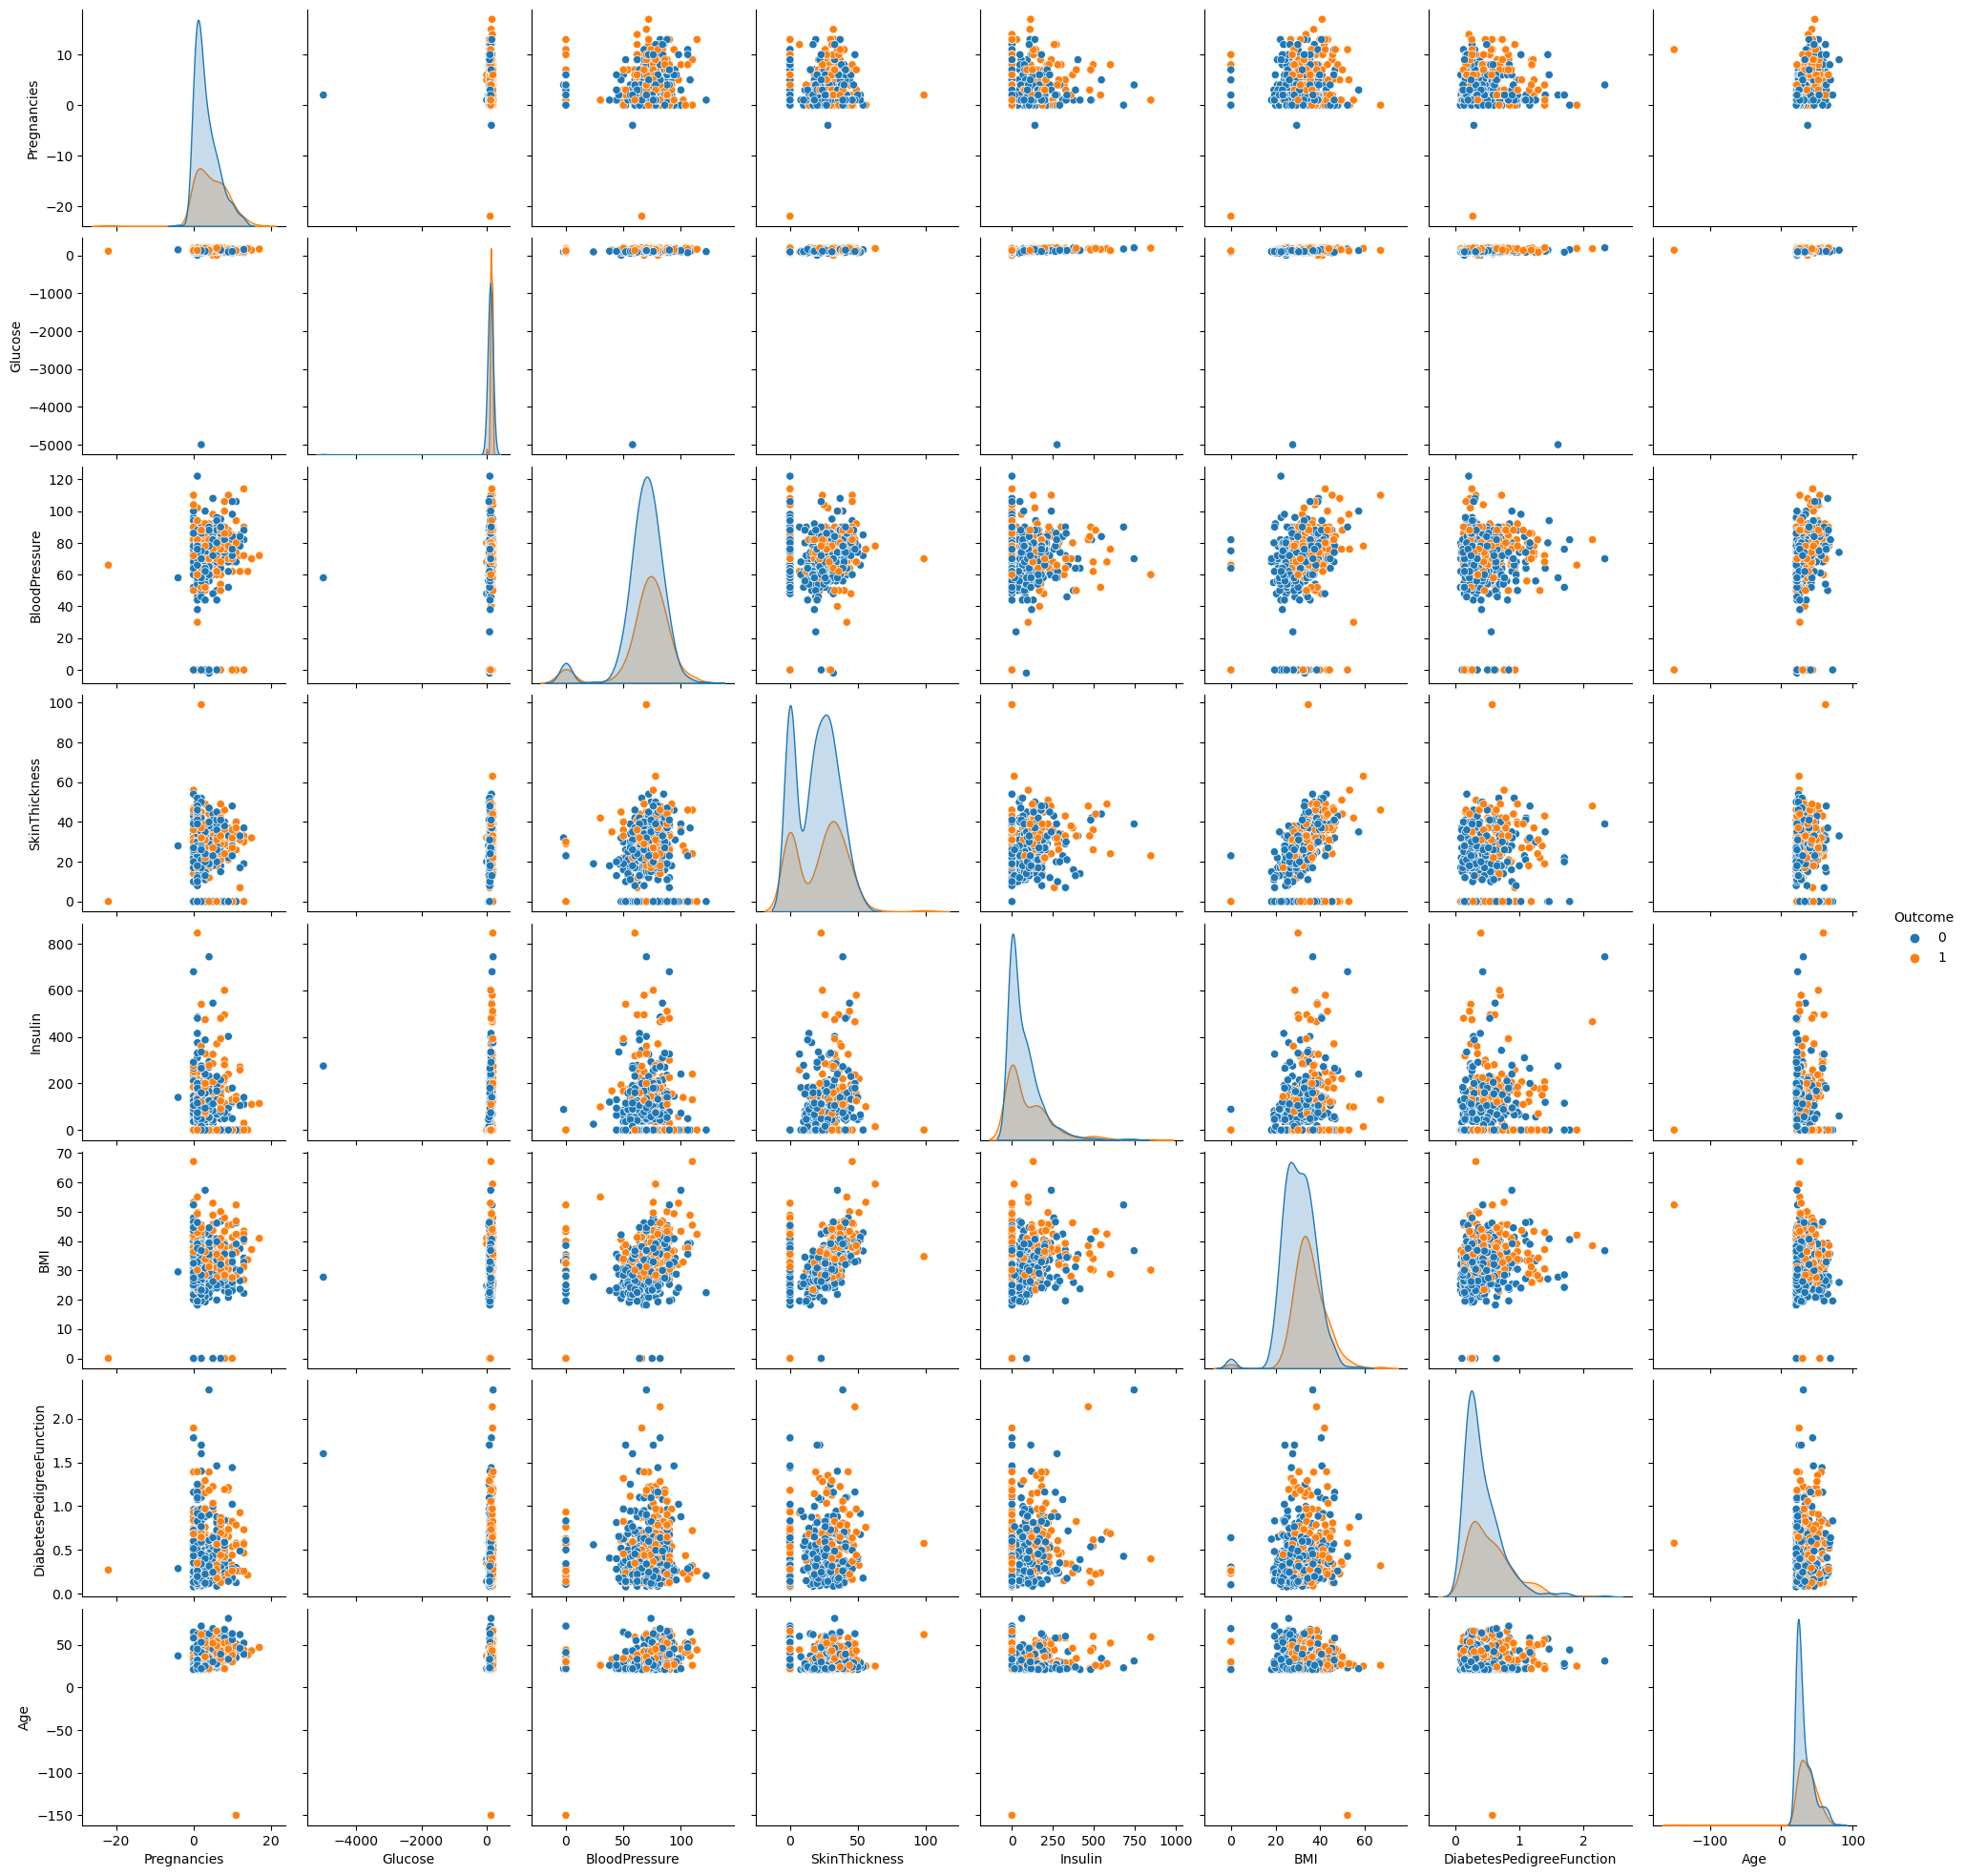

In [28]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

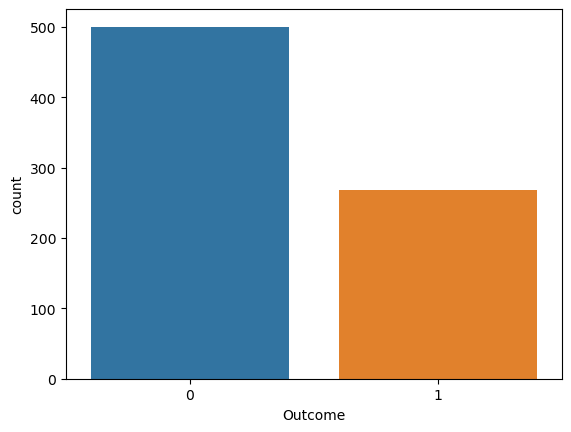

In [29]:
sns.countplot(data=df, x='Outcome')

The frequency difference between the two class is considerably high. just befor modeling we can predict that models trained with these dataset will dedicate a high choice of designation to the class with high frequency. if we want to slightly lower this occurance we can use methods like **Over Sampling** & **Under Sampling** 

The list below will show tthe most relative (dependent) features to our target label **outcome**

In [30]:
target=cor['Outcome'].where(cor['Outcome']>0.15)#& cor['Outcome']<0.39)#, cor['Outcome'] , inplace=True )
target1=target.where(cor['Outcome']!=1)
target1=target1.dropna().reset_index()
dependency_l=list(target1['index'])
target1

,index,Outcome
0,Pregnancies,0.193306
1,BMI,0.284374
2,DiabetesPedigreeFunction,0.186958
3,Age,0.152902


Obviously the BMI feature has the most correlation with target. 

## Histograms

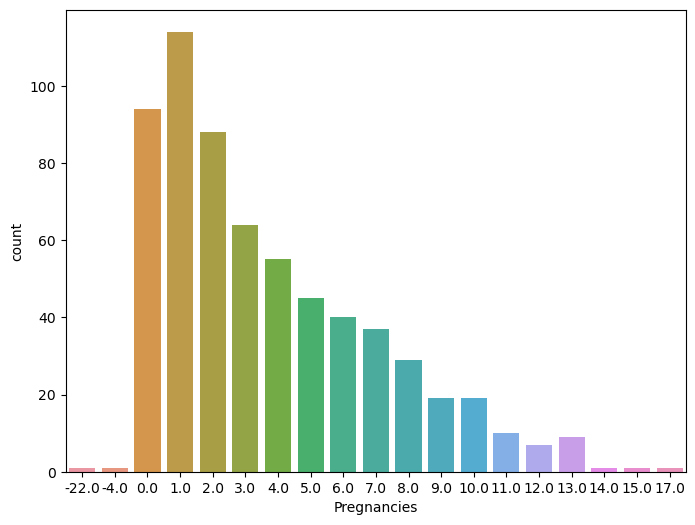

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pregnancies')
plt.show()

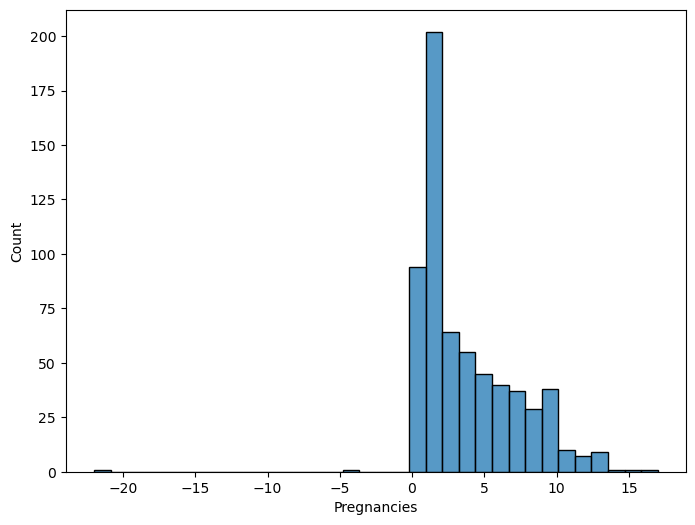

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pregnancies')
plt.show()

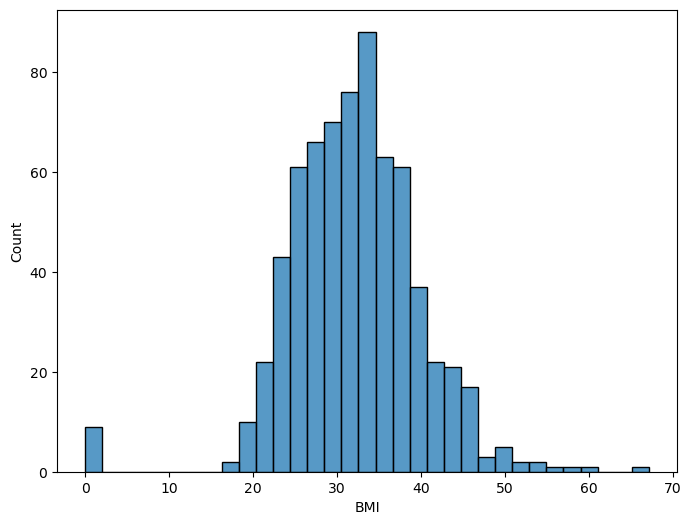

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BMI')
plt.show()

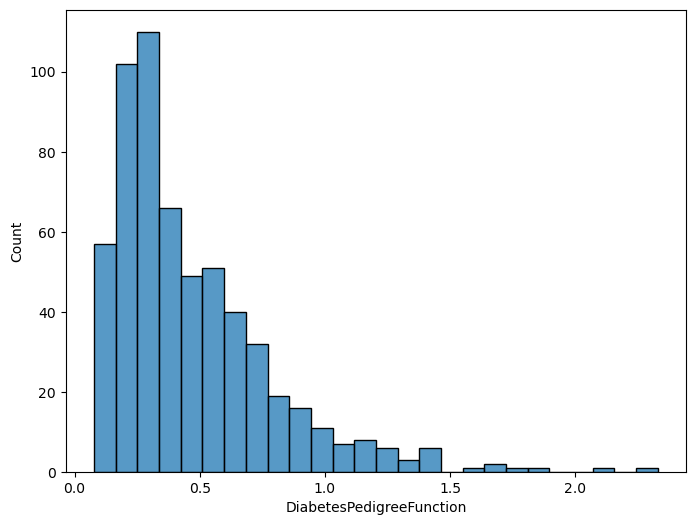

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='DiabetesPedigreeFunction')
plt.show()

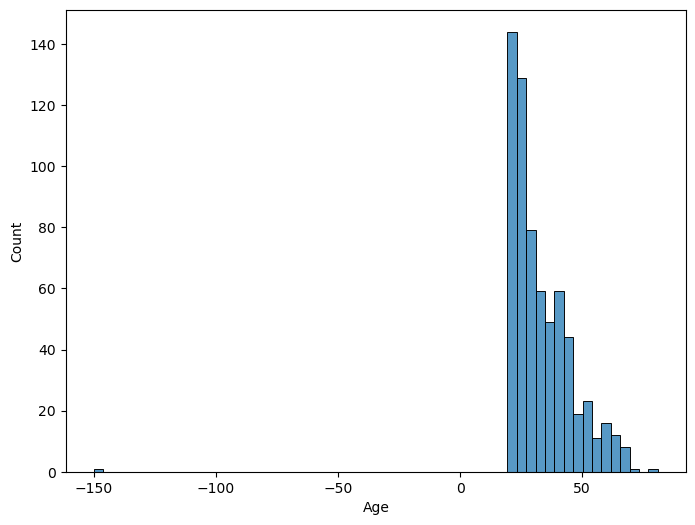

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age')
plt.show()

Histograms created for these selected features contain plenty useful information. **Pregnencies** & **Age** have inconsistent data. In an other words they are outliers and basicaly would decrease accuaracy & authenticity our model. Outliers will be dropped from dataframe in preprocessing. 

## Scatter & Hexbin

Hexbins and Scatter diagrams would present a good understanding of relation between features with classes. hexbins are in advance better diagrams cause they distinguish frequency of values for us.

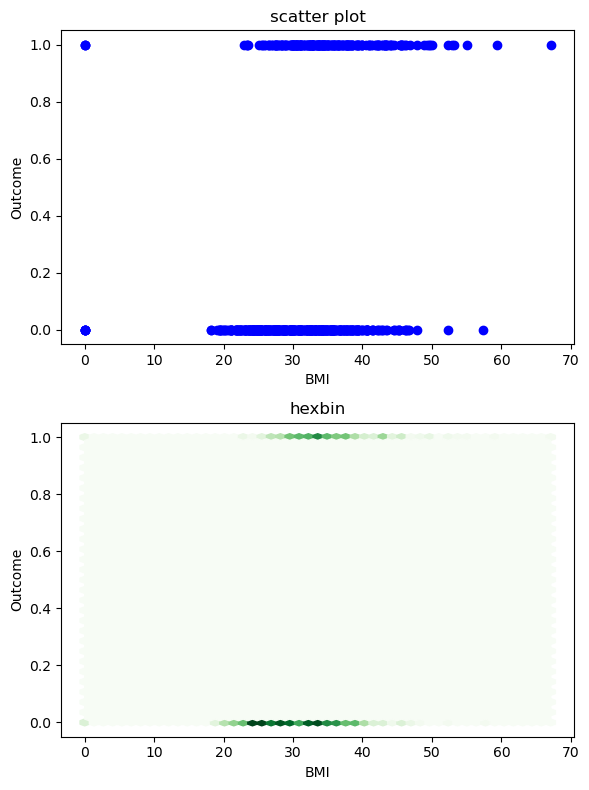

In [40]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.scatter(df['BMI'], df['Outcome'], c ="blue");
plt.xlabel('BMI'), plt.ylabel('Outcome'), plt.title('scatter plot')
plt.subplot(2,1,2)
plt.xlabel('BMI'), plt.ylabel('Outcome'), plt.title('hexbin')
plt.hexbin(df['BMI'], df['Outcome'], gridsize = 50, cmap ='Greens');
plt.tight_layout()
plt.show()

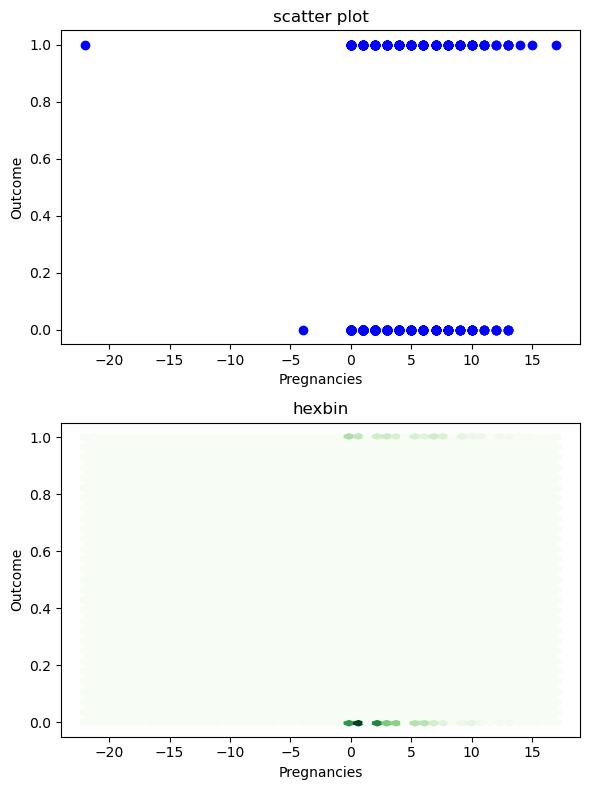

In [41]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.scatter(df['Pregnancies'], df['Outcome'], c ="blue");
plt.xlabel('Pregnancies'), plt.ylabel('Outcome'), plt.title('scatter plot')
plt.subplot(2,1,2)
plt.xlabel('Pregnancies'), plt.ylabel('Outcome'), plt.title('hexbin')
plt.hexbin(df['Pregnancies'], df['Outcome'], gridsize = 50, cmap ='Greens');
plt.tight_layout()
plt.show()

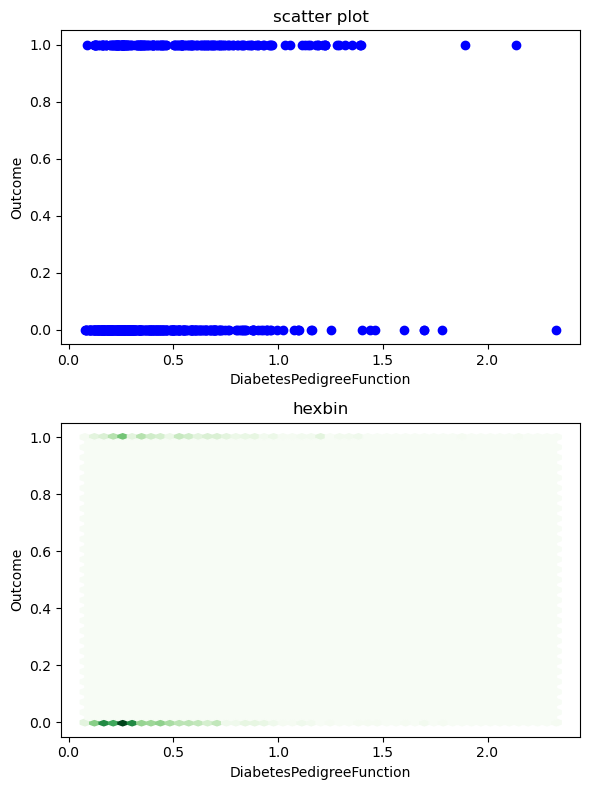

In [42]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.scatter(df['DiabetesPedigreeFunction'], df['Outcome'], c ="blue");
plt.xlabel('DiabetesPedigreeFunction'), plt.ylabel('Outcome'), plt.title('scatter plot')
plt.subplot(2,1,2)
plt.xlabel('DiabetesPedigreeFunction'), plt.ylabel('Outcome'), plt.title('hexbin')
plt.hexbin(df['DiabetesPedigreeFunction'], df['Outcome'], gridsize = 50, cmap ='Greens');
plt.tight_layout()
plt.show()

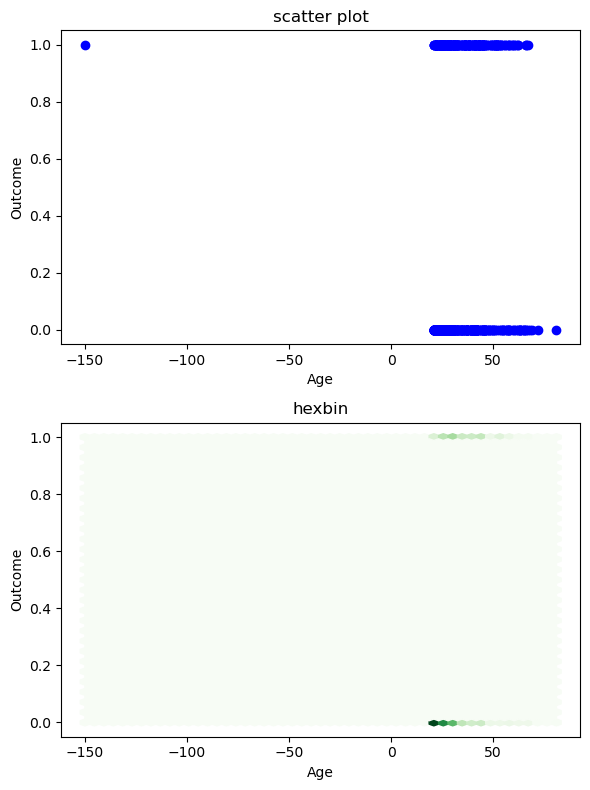

In [43]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.scatter(df['Age'], df['Outcome'], c ="blue");
plt.xlabel('Age'), plt.ylabel('Outcome'), plt.title('scatter plot')
plt.subplot(2,1,2)
plt.xlabel('Age'), plt.ylabel('Outcome'), plt.title('hexbin')
plt.hexbin(df['Age'], df['Outcome'], gridsize = 50, cmap ='Greens');
plt.tight_layout()
plt.show()

# Section 2 : Data Preprocessing

Just before starting essential steps to preprocess, let it be reminded that we have to remove outliers.

In [6]:
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Pregnancies'] < 0].index, inplace=True)

Basicaly there are two ways to handle missing values which are Imputation & Removing Data. In Dropping we simply remove the rows that have a missing value. If the portion for missing values is low, then dropping is an appropriate way and would not cause any problems for our prediction process. Imputation will inplace values based on stastic methods in cells which are missing. thses methods can be *mean*, *medium*, *mode* or *regression*. in this machine learning session we will use **Dropping**, **Mode**, **Mean** as a first step to our preproccessing.

In [7]:
df
df_drop=df.copy()
df_mode=df.copy()
df_mean=df.copy()

In [8]:
df_drop=df.dropna(inplace=False)

In [9]:
df_mean['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mode()[0])
df_mean['Glucose'] = df['Glucose'].fillna(round(df['Glucose'].mean()))
df_mean['BloodPressure'] = df['BloodPressure'].fillna(round(df['BloodPressure'].mean()))
df_mean['SkinThickness'] = df['SkinThickness'].fillna(round(df['SkinThickness'].mean()))
df_mean['Insulin'] = df['Insulin'].fillna(round(df['Insulin'].mean()))
df_mean['BMI'] = df['BMI'].fillna(round(df['BMI'].mean(),1))
df_mean['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(round(df['DiabetesPedigreeFunction'].mean(),3))
df_mean['Age'] = df['Age'].fillna(round(df['Age'].mean()))

In [10]:
df_mode['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mode()[0])
df_mode['Glucose'] = df['Glucose'].fillna(round(df['Glucose'].mode()[0]))
df_mode['BloodPressure'] = df['BloodPressure'].fillna(round(df['BloodPressure'].mode()[0]))
df_mode['SkinThickness'] = df['SkinThickness'].fillna(round(df['SkinThickness'].mode()[0]))
df_mode['Insulin'] = df['Insulin'].fillna(round(df['Insulin'].mode()[0]))
df_mode['BMI'] = df['BMI'].fillna(round(df['BMI'].mode()[0],1))
df_mode['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(round(df['DiabetesPedigreeFunction'].mode()[0],3))
df_mode['Age'] = df['Age'].fillna(round(df['Age'].mode()[0]))

In [11]:
df_drop

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
12,10.0,139.0,80.0,0.0,0.0,27.1,1.441,57.0,0
...,...,...,...,...,...,...,...,...,...
741,3.0,102.0,44.0,20.0,94.0,30.8,0.400,26.0,0
747,1.0,81.0,74.0,41.0,57.0,46.3,1.096,32.0,0
750,4.0,136.0,70.0,0.0,0.0,31.2,1.182,22.0,1
758,1.0,106.0,76.0,0.0,0.0,37.5,0.197,26.0,0


In [13]:
df_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,1.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,1.0,137.0,40.0,35.0,168.0,32.1,0.467,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.467,63.0,0
764,2.0,122.0,70.0,20.0,0.0,36.8,0.340,33.0,0
765,5.0,113.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,20.0,0.0,30.1,0.349,33.0,1


In [12]:
df_mode

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,1.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,1.0,137.0,40.0,35.0,168.0,31.2,0.207,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.207,63.0,0
764,2.0,122.0,70.0,0.0,0.0,36.8,0.340,22.0,0
765,5.0,99.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,22.0,1


The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges in which our case does.

In [2]:
def standardize_df(df):
    standardized_df = (df-df.mean())/df.std()
    standardized_df['standardOutcome'] = df['Outcome']
    standardized_df.drop(['Outcome'], axis=1, inplace=True)
    return standardized_df

In [153]:
def normalize_df(df):
    normalization_df = (df-df.min())/df.max()
    normalization_df['standardOutcome'] = df['Outcome']
    normalization_df.drop(['Outcome'], axis=1, inplace=True)
    return normalization_df

In [4]:
df_std = standardize_df(df_mean)
df_std = standardize_df(df_mode)
df_std = standardize_df(df_drop)

In [58]:
df_norm = normalize_df(df_mean)
df_norm = standardize_df(df_modnorme)
df_norm = standardize_df(df_drop)

### Categorical Data
Categorical data should be definetely altered for a machine learning analysis. this could be done with two approaches named Label Encoding and One Hot Encoding. Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned with a unique integer based on alphabetical ordering. One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

### Should we drop a column?
During many instances, some columns may not be relevant to your analysis, or they will contain so many missig values that keeping them in our dataframe would not be a help anymore. In cases like these it is better to drop the whole feature from our dataframe. In our data set all features have a almost low portion of NAN values and relevencies are in mid-level value. Hence, there is no need to drop a column.

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_std, test_size=0.2, shuffle=True, random_state=42)

In [17]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,standardOutcome
339,1.161464,0.345076,0.004399,-0.022941,-0.735217,1.075819,-0.481084,0.697353,1
691,3.027450,0.238410,2.446969,-1.410288,-0.735217,1.407023,-0.742667,0.971493,1
293,-0.704521,0.078410,-1.135467,1.711243,1.044660,1.158620,0.515758,-0.856103,1
690,-0.704521,-0.033589,0.601472,-1.410288,-0.735217,-1.035609,-0.000337,0.057695,0
90,-0.704521,-0.177589,-0.755512,-1.410288,-0.735217,-1.794619,-0.739132,-1.130243,0
...,...,...,...,...,...,...,...,...,...
71,0.539469,0.137077,-0.266998,1.017569,0.549230,-0.483602,-0.198292,-0.673344,0
106,-0.704521,-0.092256,2.881204,-1.410288,-0.735217,-1.339213,-0.919412,-0.033685,0
273,-0.704521,-0.225589,0.492913,2.058080,-0.322359,0.151207,-0.159408,-1.130243,0
438,-0.704521,-0.086923,0.058678,-0.369778,-0.735217,-1.918820,-0.000337,-1.130243,0


In [18]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,standardOutcome
360,0.539469,0.403743,-0.266998,0.878835,2.246536,-0.124797,-0.000337,-0.399204,1
262,0.228471,-0.097589,0.058678,-0.022941,-0.735217,-0.000595,0.512223,-0.856103,0
754,-0.704521,0.217077,0.492913,-0.022941,-0.735217,0.040805,-0.000337,1.062873,1
196,-0.704521,-0.001590,-0.592674,-0.022941,-0.001247,-1.077009,-0.990110,-0.033685,0
336,-1.015519,0.019744,-3.740875,-1.410288,-0.735217,0.234008,-0.000337,0.971493,0
...,...,...,...,...,...,...,...,...,...
60,-0.393524,-0.156256,-3.740875,-1.410288,-0.735217,-0.000595,-0.576526,-1.130243,0
555,1.161464,0.057077,0.004399,0.878835,1.237327,-0.911407,-1.082017,0.331834,0
345,1.472462,0.067744,1.035707,1.086937,-0.001247,0.882616,-0.417456,1.428392,0
327,-0.704521,0.350410,0.058678,-1.410288,-0.735217,0.413410,-0.944156,0.331834,0


### Spliting Data:
basicaly data can be splited in two different ways.
1-Splitting Randomly
2-Splitting using the temporal component

We don’t want our model to over-learn from training data and perform poorly after being deployed in production. You need to have a mechanism to assess how well your model is generalizing. Hence, you need to separate your input data into training, validation, and testing subsets to prevent your model from overfitting and to evaluate your model effectively.
In most cases it is common to divide dataframe in to two different groups of test and train. Mostly 80 % percent of the data frame is dedicated to the trian and the remaining 20 % will be test. If the validation takes apart the portion could be altered to train: 80 % test: 10 % valid: 10 %


In [149]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_std, target = 'standardOutcome', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1, random_state=1)


In [23]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((612, 8), (612,), (76, 8), (76,), (77, 8), (77,))

# Section 3: Modeling

## Decision Tree
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model_tree = DecisionTreeClassifier(max_depth=3);#class_weight='balanced')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

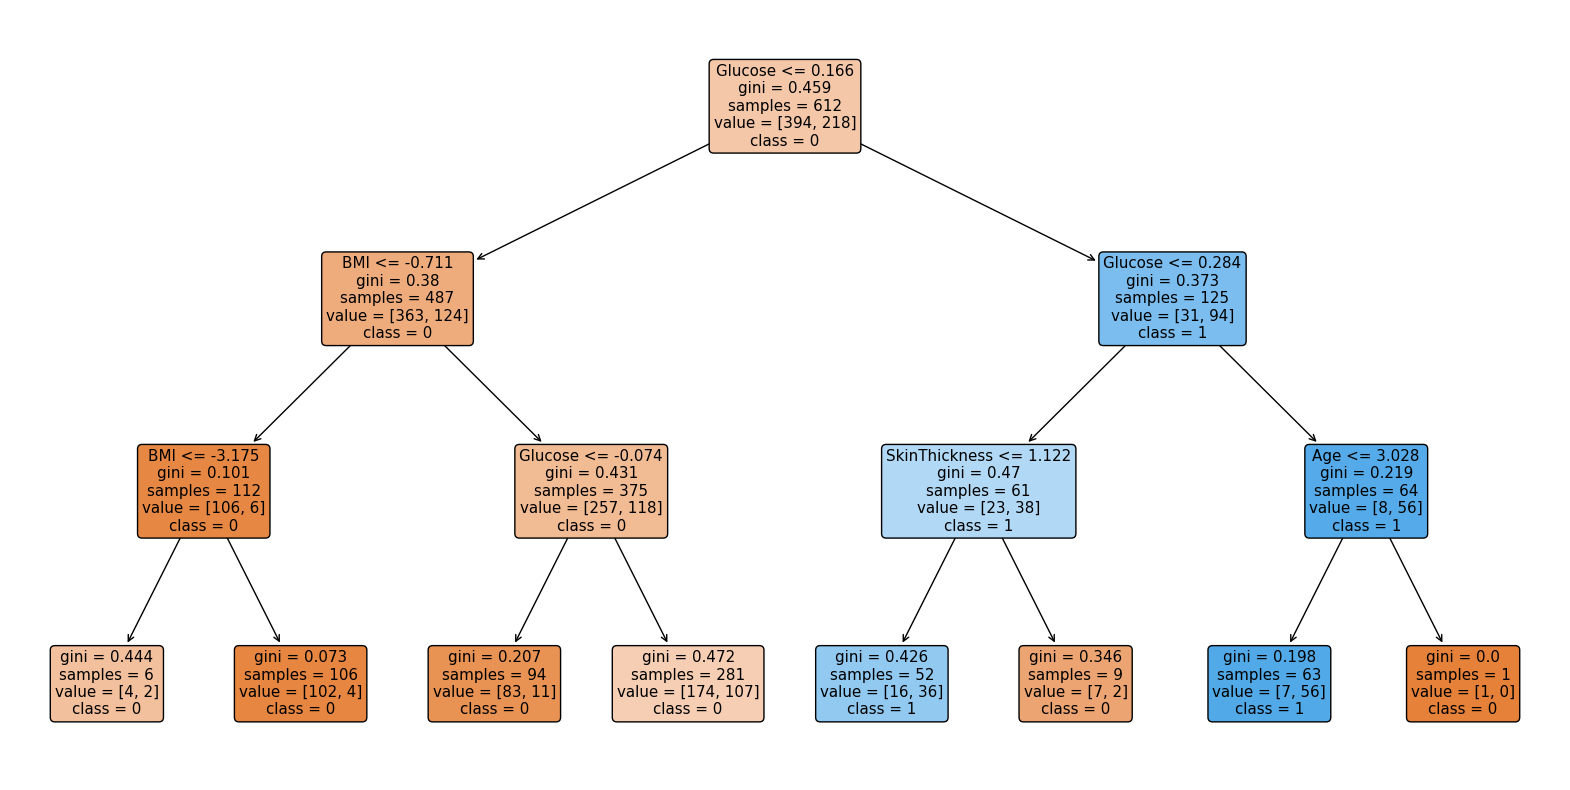

In [31]:
plt.figure(figsize=(20,10))
var_columns = [c for c in X_train.columns]
plot_tree(model_tree,
           feature_names = var_columns, #Feature names
           class_names = ["0","1"], #Class names
           rounded = True,
           filled = True)

plt.show()

In [34]:
from sklearn.metrics import classification_report
y_train_pred = model_tree.predict(X_train)
y_valid_pred = model_tree.predict(X_valid)
# y_test_pred = model_tree.predict(X_test)
# print(classification_report(y_test, y_test_pred))

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

print("AUC Train = {}\nAUC Valid = {}".format(round(auc_train,4), round(auc_valid,4)))

Now we will be tuning the system with varying hyper parameters. The goal hyper parameters for tuning in decision tree will be maxdepth and max leaf nodes. in the grid serach section we will be tuning more of these hyper parameters.

In [53]:
def tree_training(max_leaf_nodes, max_depth, X_train, y_train, X_valid, y_valid):
    if max_depth==None: 
        model_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
        model_tree.fit(X_train, y_train)
    else:
        model_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
        model_tree.fit(X_train, y_train)
        
    y_train_pred = model_tree.predict(X_train)
    y_valid_pred = model_tree.predict(X_valid)
    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)

    return ac_train , ac_valid  
accuracyTrain=list()
accuracyValid=list()
maxDepth=None
leavesRange=range(2,80)
for numLeaf in leavesRange:
    results=tree_training(numLeaf, maxDepth, X_train, y_train, X_valid, y_valid)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("leaves:{}, maxDepth:{},  Train:{:.4f}, Valid:{:.4f},".format(numLeaf, maxDepth,
                                                                         results[0],
                                                                         results[1]))


leaves:2, maxDepth:None,  Train:0.7467, Valid:0.7368,
leaves:3, maxDepth:None,  Train:0.7467, Valid:0.7368,
leaves:4, maxDepth:None,  Train:0.7467, Valid:0.7368,
leaves:5, maxDepth:None,  Train:0.7467, Valid:0.7368,
leaves:6, maxDepth:None,  Train:0.7549, Valid:0.7368,
leaves:7, maxDepth:None,  Train:0.7778, Valid:0.7500,
leaves:8, maxDepth:None,  Train:0.7810, Valid:0.7500,
leaves:9, maxDepth:None,  Train:0.7810, Valid:0.7500,
leaves:10, maxDepth:None,  Train:0.7892, Valid:0.7500,
leaves:11, maxDepth:None,  Train:0.7974, Valid:0.7632,
leaves:12, maxDepth:None,  Train:0.8023, Valid:0.7500,
leaves:13, maxDepth:None,  Train:0.8039, Valid:0.7368,
leaves:14, maxDepth:None,  Train:0.8072, Valid:0.7500,
leaves:15, maxDepth:None,  Train:0.8105, Valid:0.7500,
leaves:16, maxDepth:None,  Train:0.8137, Valid:0.7500,
leaves:17, maxDepth:None,  Train:0.8186, Valid:0.7500,
leaves:18, maxDepth:None,  Train:0.8186, Valid:0.7500,
leaves:19, maxDepth:None,  Train:0.8252, Valid:0.7632,
leaves:20, maxDept

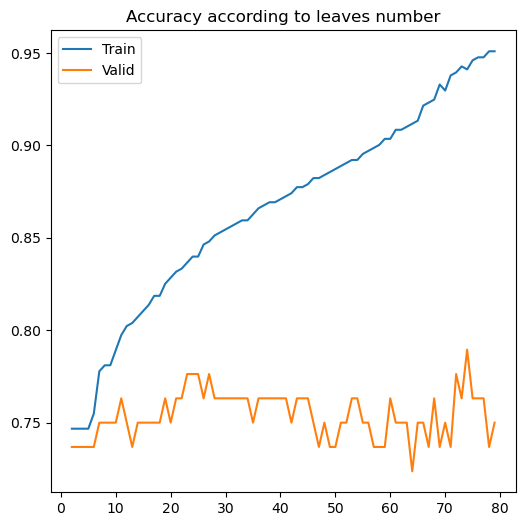

In [51]:
plt.figure(figsize=(6, 6))
plt.plot(leavesRange, accuracyTrain, label='Train')
plt.plot(leavesRange, accuracyValid, label='Valid')
plt.legend()
plt.title('Accuracy according to leaves number')
plt.show()

The goal is to reach an accuracy of higher than 90 percent in training dataset, but should be cautious about validation accuracy in order to prevent overfitting. based on the statas we can go with max_leaf_nodes=73 and keep on tuning with changing max depth

In [59]:
depth=range(1, 80)
accuracyTrain=list()
accuracyValid=list()
max_leaf_nodes=73
for maxDepth in depth:
    results=tree_training(max_leaf_nodes,maxDepth, X_train, y_train, X_valid, y_valid)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("leaves:{}, maxDepth:{},  Train:{:.4f}, Valid:{:.4f}".format(max_leaf_nodes,maxDepth,
                                                                     results[0],
                                                                     results[1]))

leaves:73, maxDepth:1,  Train:0.7467, Valid:0.7368
leaves:73, maxDepth:2,  Train:0.7467, Valid:0.7368
leaves:73, maxDepth:3,  Train:0.7565, Valid:0.7368
leaves:73, maxDepth:4,  Train:0.7680, Valid:0.7105
leaves:73, maxDepth:5,  Train:0.8137, Valid:0.7368
leaves:73, maxDepth:6,  Train:0.8399, Valid:0.7500
leaves:73, maxDepth:7,  Train:0.8627, Valid:0.7500
leaves:73, maxDepth:8,  Train:0.8742, Valid:0.7500
leaves:73, maxDepth:9,  Train:0.8954, Valid:0.7237
leaves:73, maxDepth:10,  Train:0.9085, Valid:0.7237
leaves:73, maxDepth:11,  Train:0.9183, Valid:0.7500
leaves:73, maxDepth:12,  Train:0.9199, Valid:0.7237
leaves:73, maxDepth:13,  Train:0.9265, Valid:0.7500
leaves:73, maxDepth:14,  Train:0.9248, Valid:0.7632
leaves:73, maxDepth:15,  Train:0.9265, Valid:0.7763
leaves:73, maxDepth:16,  Train:0.9330, Valid:0.7763
leaves:73, maxDepth:17,  Train:0.9379, Valid:0.7500
leaves:73, maxDepth:18,  Train:0.9428, Valid:0.7368
leaves:73, maxDepth:19,  Train:0.9412, Valid:0.7632
leaves:73, maxDepth:2

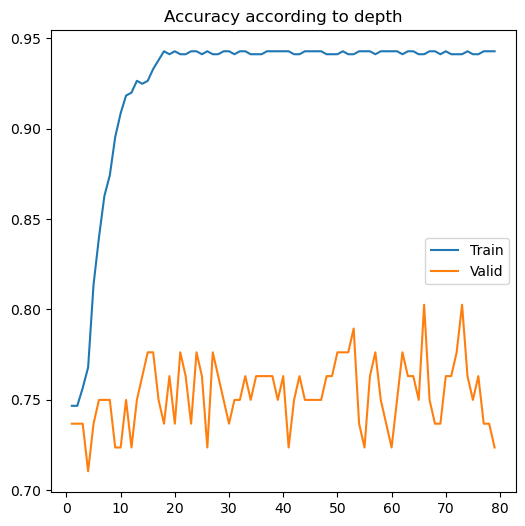

In [60]:
plt.figure(figsize=(6, 6))
plt.plot(depth, accuracyTrain, label='Train')
plt.plot(depth, accuracyValid, label='Valid')
plt.legend()
plt.title('Accuracy according to depth')
plt.show()

here we will be choosing depth = 66 as anour best value for our hyper parameter.

In [63]:
results=X_test.copy()
model_tree = DecisionTreeClassifier(max_leaf_nodes=73, max_depth=66)
model_tree.fit(X_train, y_train)
y_test_pred = model_tree.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        55
           1       0.48      0.45      0.47        22

    accuracy                           0.70        77
   macro avg       0.63      0.63      0.63        77
weighted avg       0.70      0.70      0.70        77



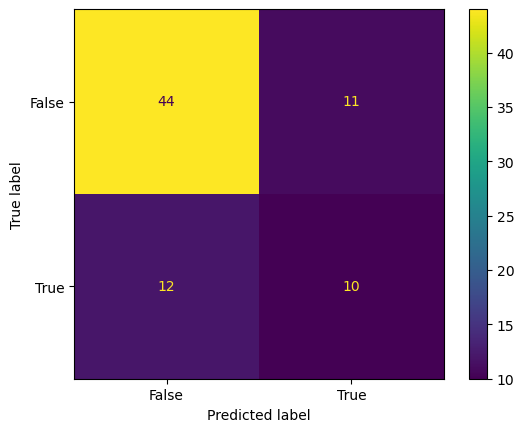

In [64]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## KNN
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [66]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train, y_train)
y_train_pred=model_KNN.predict(X_train)
y_valid_pred=model_KNN.predict(X_valid)

auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

print("AUC Train = {}\nAUC Valid = {}".format(round(auc_train,4), round(auc_valid,4)))

AUC Train = 0.7892
AUC Valid = 0.6215


In [76]:
def KNN_training(n_neighbors, X_train, y_train, X_valid, y_valid):
    model_KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_KNN.fit(X_train, y_train)
    
    y_train_pred = model_KNN.predict(X_train)
    y_valid_pred = model_KNN.predict(X_valid)
    

    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    
    return ac_train , ac_valid
          
neighboursRange=range(1, 90)
accuracyTrain=list()
accuracyValid=list()
for n in neighboursRange:
    results=KNN_training(n, X_train, y_train, X_valid, y_valid)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("Neighbours:{}, Train:{:.4f}, Valid:{:.4f}".format(n,
                                                             results[0],
                                                             results[1]))

Neighbours:1, Train:1.0000, Valid:0.6053
Neighbours:2, Train:0.8072, Valid:0.6579
Neighbours:3, Train:0.8170, Valid:0.6842
Neighbours:4, Train:0.7614, Valid:0.6579
Neighbours:5, Train:0.7810, Valid:0.6579
Neighbours:6, Train:0.7631, Valid:0.6842
Neighbours:7, Train:0.7614, Valid:0.6711
Neighbours:8, Train:0.7451, Valid:0.6842
Neighbours:9, Train:0.7435, Valid:0.6579
Neighbours:10, Train:0.7255, Valid:0.6184
Neighbours:11, Train:0.7190, Valid:0.6579
Neighbours:12, Train:0.7075, Valid:0.6316
Neighbours:13, Train:0.7239, Valid:0.6184
Neighbours:14, Train:0.7108, Valid:0.6184
Neighbours:15, Train:0.7075, Valid:0.6184
Neighbours:16, Train:0.6977, Valid:0.6184
Neighbours:17, Train:0.7108, Valid:0.6316
Neighbours:18, Train:0.7108, Valid:0.5921
Neighbours:19, Train:0.7141, Valid:0.6316
Neighbours:20, Train:0.7108, Valid:0.6447
Neighbours:21, Train:0.7173, Valid:0.6447
Neighbours:22, Train:0.7092, Valid:0.6579
Neighbours:23, Train:0.7124, Valid:0.6579
Neighbours:24, Train:0.6879, Valid:0.6579
N

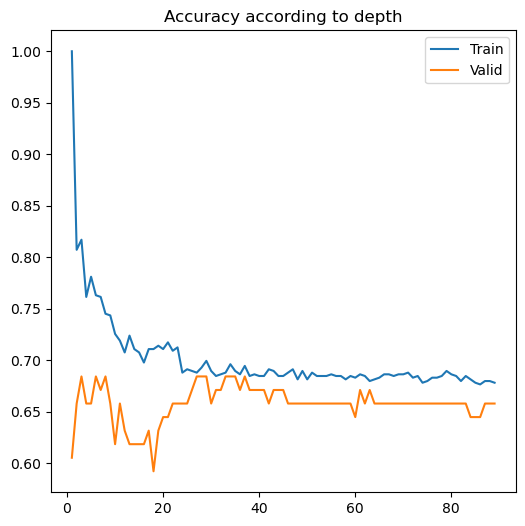

In [77]:
plt.figure(figsize=(6, 6))
plt.plot(neighboursRange, accuracyTrain, label='Train')
plt.plot(neighboursRange, accuracyValid, label='Valid')
plt.legend()
plt.title('Accuracy according to depth')
plt.show()

Based on the stats and the plot, we choose the value 6 as number of neighbours.

In [79]:
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train, y_train)
y_test_pred = model_KNN.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        55
           1       0.67      0.27      0.39        22

    accuracy                           0.75        77
   macro avg       0.72      0.61      0.62        77
weighted avg       0.74      0.75      0.71        77



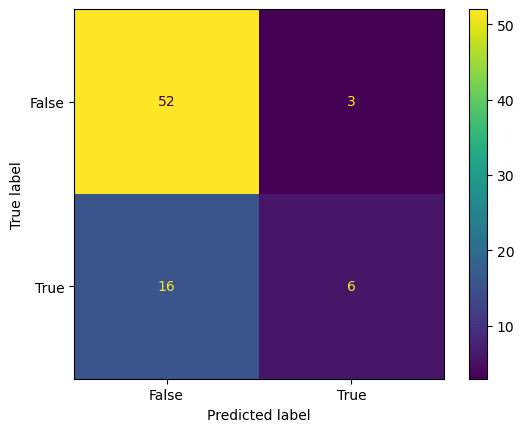

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Logistic Regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_train_pred=log_model.predict(X_train)
y_valid_pred=log_model.predict(X_valid)

auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

print("AUC Train = {}\nAUC Valid = {}".format(round(auc_train,4), round(auc_valid,4)))

AUC Train = 0.711
AUC Valid = 0.7


The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength. We start tuning with solver.

In [83]:
clf = [LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)


    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                            ))


Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(max_iter=1000, penalty='none'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='sag'),  Train:0.7598, Valid:0.7895
Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='saga'),  Train:0.7598, Valid:0.7895


Assigning **l2** as penalty type.

In [91]:
clf = [LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)

    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                                     ))
    

Algorithm:LogisticRegression(max_iter=1000, solver='newton-cg'),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(max_iter=1000),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(max_iter=1000, solver='sag'),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(max_iter=1000, solver='saga'),  Train:0.7582, Valid:0.7632


In the next three cells we will try to tune with max_iteration parameter and try to get best solution.

In [92]:
clf = [LogisticRegression(solver='newton-cg',penalty='l2',max_iter=100),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=100),
    LogisticRegression(solver='sag',penalty='l2',max_iter=100),
    LogisticRegression(solver='saga',penalty='l2',max_iter=100)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)

    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                                     ))
    

Algorithm:LogisticRegression(solver='newton-cg'),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(solver='sag'),  Train:0.7533, Valid:0.7632
Algorithm:LogisticRegression(solver='saga'),  Train:0.7451, Valid:0.7632


In [93]:
clf = [LogisticRegression(solver='newton-cg',penalty='l2',max_iter=10),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=10),
    LogisticRegression(solver='sag',penalty='l2',max_iter=10),
    LogisticRegression(solver='saga',penalty='l2',max_iter=10)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)

    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                                     ))
    

Algorithm:LogisticRegression(max_iter=10, solver='newton-cg'),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(max_iter=10),  Train:0.7598, Valid:0.7632
Algorithm:LogisticRegression(max_iter=10, solver='sag'),  Train:0.7010, Valid:0.7368
Algorithm:LogisticRegression(max_iter=10, solver='saga'),  Train:0.6846, Valid:0.7237


In [133]:
clf = [LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1,C=10)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)

    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                                     ))

Algorithm:LogisticRegression(max_iter=1, solver='newton-cg'),  Train:0.7010, Valid:0.7105
Algorithm:LogisticRegression(max_iter=1),  Train:0.7010, Valid:0.7105
Algorithm:LogisticRegression(max_iter=1, solver='sag'),  Train:0.6928, Valid:0.7237
Algorithm:LogisticRegression(C=10, max_iter=1, solver='saga'),  Train:0.6993, Valid:0.7237


we observe that in Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg') we get best results and as an final change we will be varying C parameter which is a penalty term, meant to disincentivize and regulate overfitting.

In [142]:
cRange=range(0,100,10)
accuracyTrain=list()
accuracyValid=list()
for C in cRange:
    log_model=LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000,C=C)
    log_model.fit(X_train,y_train)
    y_train_pred=log_model.predict(X_train)
    y_valid_pred=log_model.predict(X_valid)
    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    accuracyTrain.append(ac_train)
    accuracyValid.append(ac_valid)
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(log_model,
                                                                ac_train,
                                                                ac_valid,
                                                                         ))

Algorithm:LogisticRegression(C=0, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=10, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=20, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=30, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=40, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=50, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=60, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=70, max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7614, Valid:0.7895
Algorithm:LogisticRegression(C=80, max_iter=1000, penalty='none', solver='newton-

based on the data in upper part we recognize that **C** Parameter does not change our model on the selected config.(although it will make an alter in other forms).

In [143]:
log_model = LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000)
log_model.fit(X_train,y_train)
y_test_pred = log_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        55
           1       0.78      0.32      0.45        22

    accuracy                           0.78        77
   macro avg       0.78      0.64      0.66        77
weighted avg       0.78      0.78      0.74        77



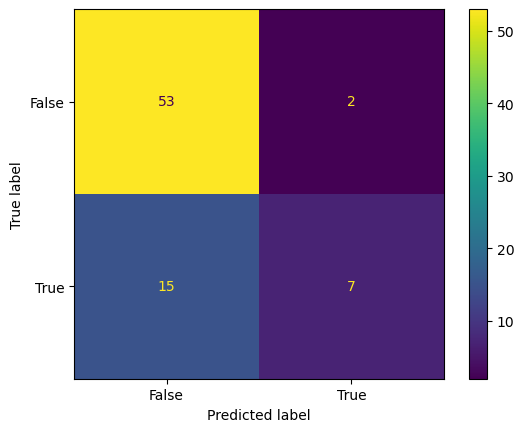

In [145]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_test_pred )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Grid Search
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. here we will implement this method on decision tree since it has dozens of hyper parameters with a vast Domain.

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid={
            'max_leaf_nodes': [1, 10, 20, 30, 40, 50, 60],
            'max_depth': [1, 20, 30, 40, 50, 60, 70, ],
            'min_samples_split': [1, 20, 30, 40, 50, 60, 70, 80],
            'max_features': [1, 5, 10, 15, 20],
            'min_samples_leaf': [1, 5, 10, 15, 20],
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [186]:
gsc.fit(X_train,y_train)
y_test_pred = gsc.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        55
           1       0.64      0.32      0.42        22

    accuracy                           0.75        77
   macro avg       0.70      0.62      0.63        77
weighted avg       0.73      0.75      0.72        77



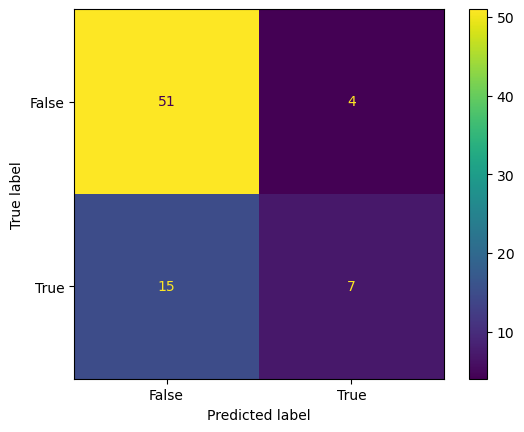

In [187]:
confusion_matrix = metrics.confusion_matrix(y_test,  y_test_pred )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

We will face an increase in accuracy when comparing Decision tree with grid search concept.

## Over fitting and Under fitting
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Underfitting refers to a model that can neither model the training data nor generalize to new data.
An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.
Since we have been checking our model with validation, we have chosen a trainig which does not have an overfit.

## Changing the preprocessed data

In [154]:
df_norm = normalize_df(df_drop)

In [155]:
from fast_ml.model_development import train_valid_test_split

X_train_New, y_train_New, X_valid_New, y_valid_New, X_test_New, y_test_New = train_valid_test_split(df_norm, target = 'standardOutcome', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1, random_state=1)


## Decision Tree

In [157]:
accuracyTrain=list()
accuracyValid=list()
maxDepth=None
leavesRange=range(2,40)
for numLeaf in leavesRange:
    results=tree_training(numLeaf, maxDepth, X_train_New, y_train_New, X_valid_New, y_valid_New)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("leaves:{}, maxDepth:{},  Train:{:.4f}, Valid:{:.4f},".format(numLeaf, maxDepth,
                                                                         results[0],
                                                                         results[1]))

leaves:2, maxDepth:None,  Train:0.6879, Valid:0.6500,
leaves:3, maxDepth:None,  Train:0.8025, Valid:0.6500,
leaves:4, maxDepth:None,  Train:0.8025, Valid:0.6500,
leaves:5, maxDepth:None,  Train:0.8344, Valid:0.5500,
leaves:6, maxDepth:None,  Train:0.8408, Valid:0.5000,
leaves:7, maxDepth:None,  Train:0.8471, Valid:0.5000,
leaves:8, maxDepth:None,  Train:0.8726, Valid:0.5500,
leaves:9, maxDepth:None,  Train:0.8854, Valid:0.5500,
leaves:10, maxDepth:None,  Train:0.8981, Valid:0.5500,
leaves:11, maxDepth:None,  Train:0.9108, Valid:0.6000,
leaves:12, maxDepth:None,  Train:0.9236, Valid:0.6000,
leaves:13, maxDepth:None,  Train:0.9299, Valid:0.6000,
leaves:14, maxDepth:None,  Train:0.9363, Valid:0.5500,
leaves:15, maxDepth:None,  Train:0.9427, Valid:0.5500,
leaves:16, maxDepth:None,  Train:0.9427, Valid:0.6000,
leaves:17, maxDepth:None,  Train:0.9427, Valid:0.6000,
leaves:18, maxDepth:None,  Train:0.9618, Valid:0.5500,
leaves:19, maxDepth:None,  Train:0.9682, Valid:0.5000,
leaves:20, maxDept

Clearly we can see the model is not moving in a correct path since the Train accuracy reaches to 100% , on the other hand the model does not perform well with validation and accuracy . Simply we observe overfitting. 
we will continue to train other models with this dataframe which its missing values have been dropped, but clearly since the size of dataframe has been decreased, we do not expect an appropriate model with this data.

## KNN

In [158]:
neighboursRange=range(1, 60)
accuracyTrain=list()
accuracyValid=list()
for n in neighboursRange:
    results=KNN_training(n, X_train_New, y_train_New, X_valid_New, y_valid_New)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("Neighbours:{}, Train:{:.4f}, Valid:{:.4f}".format(n,
                                                             results[0],
                                                             results[1]))

Neighbours:1, Train:1.0000, Valid:0.6500
Neighbours:2, Train:0.8217, Valid:0.6000
Neighbours:3, Train:0.8280, Valid:0.6000
Neighbours:4, Train:0.7771, Valid:0.6500
Neighbours:5, Train:0.8089, Valid:0.7000
Neighbours:6, Train:0.7452, Valid:0.7000
Neighbours:7, Train:0.7898, Valid:0.7000
Neighbours:8, Train:0.7325, Valid:0.6500
Neighbours:9, Train:0.7580, Valid:0.6500
Neighbours:10, Train:0.7580, Valid:0.6500
Neighbours:11, Train:0.7771, Valid:0.6500
Neighbours:12, Train:0.7389, Valid:0.7000
Neighbours:13, Train:0.7516, Valid:0.7000
Neighbours:14, Train:0.7452, Valid:0.7000
Neighbours:15, Train:0.7643, Valid:0.6500
Neighbours:16, Train:0.7389, Valid:0.7000
Neighbours:17, Train:0.7771, Valid:0.6500
Neighbours:18, Train:0.7643, Valid:0.7000
Neighbours:19, Train:0.7580, Valid:0.6500
Neighbours:20, Train:0.7325, Valid:0.7000
Neighbours:21, Train:0.7707, Valid:0.7000
Neighbours:22, Train:0.7643, Valid:0.7000
Neighbours:23, Train:0.7707, Valid:0.7000
Neighbours:24, Train:0.7134, Valid:0.7000
N

Also we are unable to reach to higher accuracies with KNN modeling with dropped dataframe.

In [161]:
clf = [LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
for alg in clf:
    log_model=alg
    log_model.fit(X_train_New,y_train_New)
    y_train_pred_New=log_model.predict(X_train_New)
    y_valid_pred_New=log_model.predict(X_valid_New)


    ac_train = metrics.accuracy_score(y_train_New, y_train_pred_New)
    ac_valid = metrics.accuracy_score(y_valid_New, y_valid_pred_New)
    
    print("Algorithm:{},  Train:{:.4f}, Valid:{:.4f}".format(alg,
                                                            ac_train,
                                                            ac_valid,
                                                            ))


Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg'),  Train:0.7707, Valid:0.5500
Algorithm:LogisticRegression(max_iter=1000, penalty='none'),  Train:0.7707, Valid:0.5500
Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='sag'),  Train:0.7707, Valid:0.5500
Algorithm:LogisticRegression(max_iter=1000, penalty='none', solver='saga'),  Train:0.7707, Valid:0.5500


Neighter Logistic regression nor KNN perform accurately with this dataframe. 

# Section 4: Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_depth=5)
forest_model.fit(X_train,y_train) 

y_train_pred = forest_model.predict(X_train)
y_valid_pred = forest_model.predict(X_valid)

In [167]:
def randomForests_training(max_depth,n_estimators, X_train, y_train, X_valid, y_valid):
    if n_estimators==None:
        forest_model = RandomForestClassifier(max_depth=max_depth)
        forest_model.fit(X_train, y_train)
    else:
        forest_model = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
        forest_model.fit(X_train, y_train)
    
    y_train_pred = forest_model.predict(X_train)
    y_valid_pred = forest_model.predict(X_valid)
    
    ac_train = metrics.accuracy_score(y_train, y_train_pred)
    ac_valid = metrics.accuracy_score(y_valid, y_valid_pred)
    
    return ac_train , ac_valid 
depth=range(1, 20)
accuracyTrain=list()
accuracyValid=list()
n_estimators=None
for maxDepth in depth:
    results=randomForests_training(maxDepth,None, X_train, y_train, X_valid, y_valid)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("max_depth:{}, n_estimators:{},  Train:{:.4f}, Valid:{:.4f}".format(maxDepth,n_estimators,
                                                                     results[0],
                                                                     results[1],
                                                                     ))

max_depth:1, n_estimators:None,  Train:0.7075, Valid:0.6842
max_depth:2, n_estimators:None,  Train:0.7467, Valid:0.7105
max_depth:3, n_estimators:None,  Train:0.7794, Valid:0.7237
max_depth:4, n_estimators:None,  Train:0.8007, Valid:0.7368
max_depth:5, n_estimators:None,  Train:0.8382, Valid:0.7895
max_depth:6, n_estimators:None,  Train:0.8709, Valid:0.7368
max_depth:7, n_estimators:None,  Train:0.9069, Valid:0.7895
max_depth:8, n_estimators:None,  Train:0.9265, Valid:0.7632
max_depth:9, n_estimators:None,  Train:0.9542, Valid:0.7895
max_depth:10, n_estimators:None,  Train:0.9755, Valid:0.8026
max_depth:11, n_estimators:None,  Train:0.9886, Valid:0.8289
max_depth:12, n_estimators:None,  Train:0.9951, Valid:0.7763
max_depth:13, n_estimators:None,  Train:0.9984, Valid:0.7895
max_depth:14, n_estimators:None,  Train:1.0000, Valid:0.8026
max_depth:15, n_estimators:None,  Train:1.0000, Valid:0.8289
max_depth:16, n_estimators:None,  Train:1.0000, Valid:0.7895
max_depth:17, n_estimators:None, 

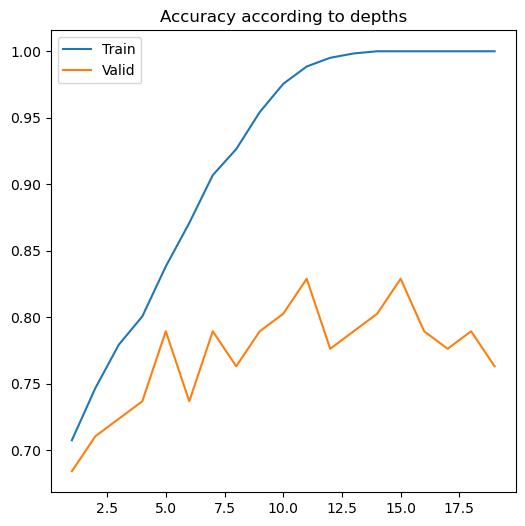

In [168]:
plt.figure(figsize=(6, 6))
plt.plot(depth, accuracyTrain, label='Train')
plt.plot(depth, accuracyValid, label='Valid')
plt.legend()
plt.title('Accuracy according to depths')
plt.show()

We choose max_depth=11 for the future hyper parameter tuning. Now we go on with n_estimators which means number of trees in the forest.

In [171]:
n_estimator=range(2, 30)
accuracyTrain=list()
accuracyValid=list()
maxDepth=11
for n in n_estimator:
    results=randomForests_training(maxDepth,n, X_train, y_train, X_valid, y_valid)
    accuracyTrain.append(results[0]);
    accuracyValid.append(results[1]);
    print("max_depth:{}, n_estimators:{},  Train:{:.4f}, Valid:{:.4f}".format(maxDepth,n,
                                                                     results[0],
                                                                     results[1],
                                                                     ))
    randomForests_training(4,i, X_train, y_train, X_valid, y_valid)

max_depth:11, n_estimators:2,  Train:0.8824, Valid:0.7500
max_depth:11, n_estimators:3,  Train:0.8905, Valid:0.7368
max_depth:11, n_estimators:4,  Train:0.9199, Valid:0.7500
max_depth:11, n_estimators:5,  Train:0.9559, Valid:0.7237
max_depth:11, n_estimators:6,  Train:0.9510, Valid:0.7632
max_depth:11, n_estimators:7,  Train:0.9624, Valid:0.7763
max_depth:11, n_estimators:8,  Train:0.9624, Valid:0.7105
max_depth:11, n_estimators:9,  Train:0.9559, Valid:0.7105
max_depth:11, n_estimators:10,  Train:0.9624, Valid:0.7763
max_depth:11, n_estimators:11,  Train:0.9641, Valid:0.7105
max_depth:11, n_estimators:12,  Train:0.9559, Valid:0.7368
max_depth:11, n_estimators:13,  Train:0.9673, Valid:0.7368
max_depth:11, n_estimators:14,  Train:0.9755, Valid:0.7763
max_depth:11, n_estimators:15,  Train:0.9673, Valid:0.8158
max_depth:11, n_estimators:16,  Train:0.9657, Valid:0.8026
max_depth:11, n_estimators:17,  Train:0.9673, Valid:0.7632
max_depth:11, n_estimators:18,  Train:0.9853, Valid:0.7895
max_d

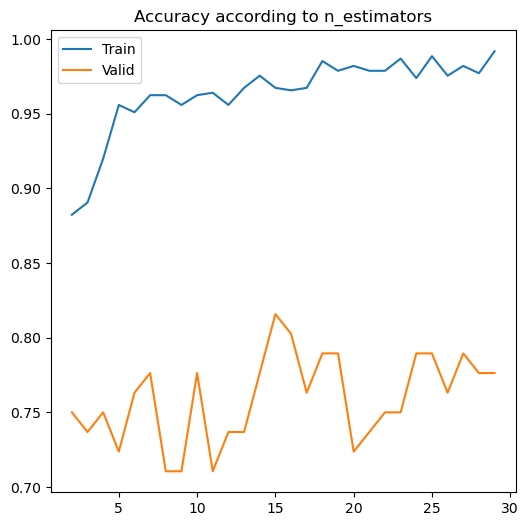

In [172]:
plt.figure(figsize=(6, 6))
plt.plot(n_estimator, accuracyTrain, label='Train')
plt.plot(n_estimator, accuracyValid, label='Valid')
plt.legend()
plt.title('Accuracy according to n_estimators')
plt.show()

And Finally we go with n_estimators=15

In [174]:
forest_model = RandomForestClassifier(max_depth=11, n_estimators=15 )
forest_model.fit(X_train,y_train)
y_test_pred = forest_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        55
           1       0.64      0.41      0.50        22

    accuracy                           0.77        77
   macro avg       0.72      0.66      0.67        77
weighted avg       0.75      0.77      0.75        77



Clearly as expected, we face a rise in the accuracy when we use random forest in comparison to the simple decision tree model.

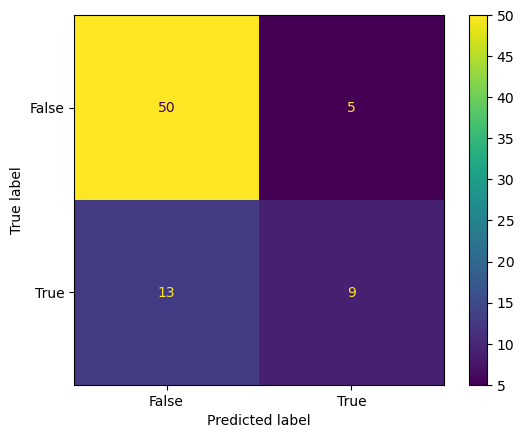

In [176]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Bias & Variance
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

In [181]:
from mlxtend.evaluate import bias_variance_decomp
mse_tree, bias_tree, var_tree = bias_variance_decomp(model_tree, np.array(X_train), np.array(y_train),np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=123)
mse_forest, bias_forest, var_forest = bias_variance_decomp(forest_model, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=123)

In [189]:
print("DecisionTree Bias:{:.4f}, DecisionTree Variance:{:.4f}, Random Forest Bias:{:.4f}, Random Forest Variance:{:.4f}".format(bias_tree,var_tree,
                                                                     bias_forest,
                                                                     var_forest,
                                                                     ))  

DecisionTree Bias:0.1592, DecisionTree Variance:0.1436, Random Forest Bias:0.1744, Random Forest Variance:0.0759


In general decision trees have high variance and low bias. Random Forests tries to reduce variance and enhance accuracy in the concept of bagging.